In [ ]:
#as of 03-01-2019, the purpose of this file has been forgotten. 

In [1]:
import pandas as pd
import numpy as np
import librosa
from matplotlib import pyplot as plt

In [2]:
X = np.load('ExpData\\X_sec0.npy')
for i in range(3):
    X = np.vstack((X,np.load('ExpData\\X_sec'+str(i+1)+'.npy')))
print(X.shape)

(1520, 22050)


In [3]:
Y = np.load('ExpData\\Y.npy')
Y.shape

(1520,)

In [4]:
#X = np.delete(X,23533,axis=0)
#Y = np.delete(Y,23533,axis=0)
#plt.plot(X[23533,:])

In [6]:
#Calculating 20 mfccs and storing them into Xc variable

errindex = [];
def my_func(a):
    return librosa.feature.mfcc(y=a, sr=4410, n_mfcc = 40)
#Xc = np.apply_along_axis(my_func, 1, X)

Xc = np.expand_dims(my_func(X[0,:]),axis=0)
for i in range(X.shape[0]-1):
    try:
        Xc = np.concatenate((Xc,np.expand_dims(my_func(X[i+1,:]),axis=0)),axis=0);
    except:
        errindex.append(i+1);
        

In [9]:
#Xc = np.expand_dims(my_func(X[0,:]),axis=0)
#Xc = np.delete(arr=Xc,obj=errindex,axis=0)
Y = np.delete(arr=Y,obj=errindex,axis=0)
#Xc = np.concatenate((Xc,np.expand_dims(my_func(X[1,:]),axis=0)),axis=0);

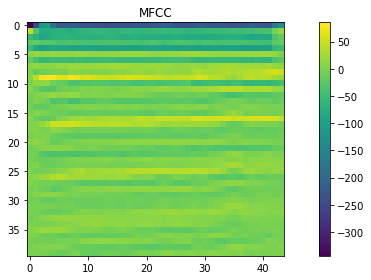

In [7]:
mfccs = librosa.feature.mfcc(y=X[523,:], sr=4410, n_mfcc = 40)
plt.figure(figsize=(10, 4))
plt.imshow(mfccs)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [10]:
#np.save('X_expmfcc.npy',Xc)
#np.save('Y.npy',Y)
#n = int(errindex[0] / 500)
#np.save('X_sec'+str(n)+'.npy',X[n*500:(n+1)*500-1])
Xc.shape

(1519, 40, 44)

In [21]:
temp = np.load('AnalysisData\\X_sec'+str(n)+'.npy')
temp[0]

array([ 0.00025562, -0.00239832,  0.00109033, ...,  0.23717392,
        0.22552075,  0.04336857])

In [7]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xlin = Xc.reshape(Xc.shape[0],-1)

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)

LabelEncoder()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Xlin, le.transform(Y), test_size=0.1, random_state=42)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
lsvc = LinearSVC(Probability=True);
lsvc.fit(X_train,y_train)

TypeError: __init__() got an unexpected keyword argument 'Probability'

In [42]:
y_pred = lsvc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5234842015371477


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',probability=True);
svc.fit(X_train,y_train)

In [41]:
y_pred = svc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5656134358098491


In [ ]:
from sklearn.naive_bayes import GuassianNB


In [ ]:
svc